In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# FFT Filter  Proof

[-0.00021985-5.37719180e-19j  0.01818986+3.62114134e-18j
  0.03659293-2.69281334e-18j ... -0.03659293-6.82342018e-18j
 -0.01818986+6.99819215e-17j  0.00021985+2.61815545e-16j]


C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
No handles with labels found to put in legend.


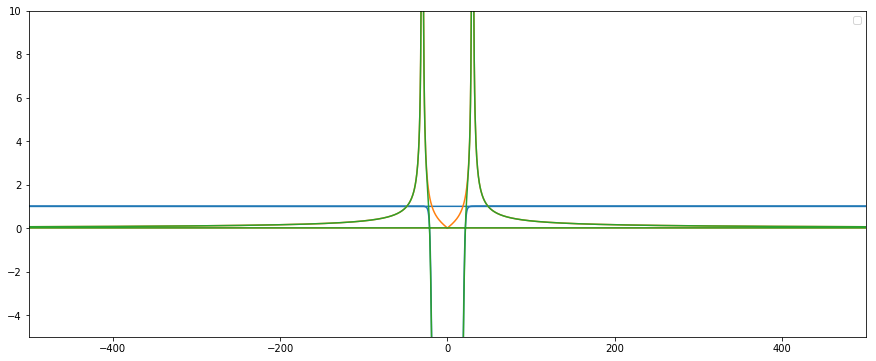

In [2]:
figsize(15,6)
# b,a = signal.butter(8,30,'highpass',fs= 10000)
sos = signal.butter(8, 12, 'highpass', fs=10000, output='sos')
b,a = signal.butter(8,5,'highpass',fs = 10000, output = 'ba')

freq,h = signal.freqz(b,a,worN= 20000,fs=10000)
freq1,h1 = signal.sosfreqz(sos,worN=20000,fs=10000)
h_mir = np.ones(shape(freq1))
h_mir = np.copy(h1)
h_mir[int(len(h)/2)+1:] = np.flip(h1[1:int(len(h)/2)])
t = linspace(0,2,20000)
sig = sin(30*2*np.pi*t)
freqs = fft.fftfreq(len(sig),1/10000)
butter_filt = signal.lfilter(b,a,sig)
fft_sig = fft.fft(sig)
fft_fixed = fft_sig*(1+20*np.log10(abs(h_mir)))
fft_fixed[0] = 0+0j
fft_filt = np.fft.ifft(fft_fixed)
print(fft_filt)
# print(fft_sig*(1+20*np.log10(abs(h_mir))))
# plot(freqs,fft_sig)
# xlim(0,1500)
plot(freqs,1+20*np.log10(abs(h_mir)))
plot(freqs,absolute(fft_sig))
plot(freqs,(1+20*np.log10(abs(h_mir)))*absolute(fft_sig))
# print(shape(fft_sig),shape(freq),(h[1]))
ylim(-5,10)
xlim(-500,500)
# plot(absolute(20*np.log10(absolute(h))/10000))
# plot(t,sig,label='Original')
# plot(t,butter_filt,label='Butter')
# plot(t,fft_filt,label='FFT')
legend()
# xlim(0,0.05)
# semilogx(freq, 20*np.log10(abs(h)),label='standard')

# print(shape(freq))

# Comparison of Function Filter and FFT Filter

C:\Users\jgoet\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-2, 2)

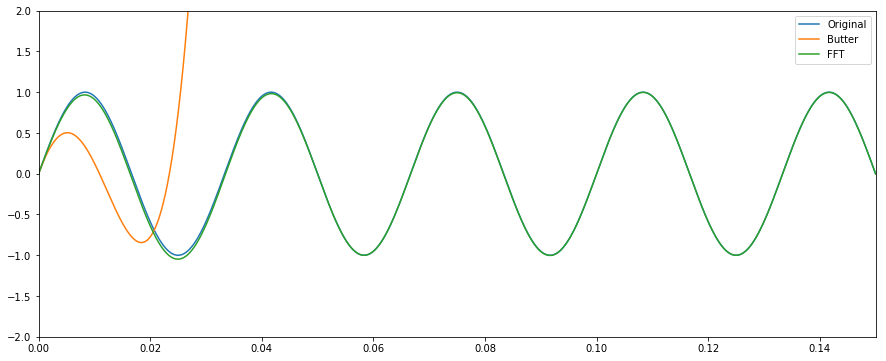

In [3]:
# plot(absolute(20*np.log10(absolute(h))/10000))
plot(t,sig,label='Original')
plot(t,butter_filt,label='Butter')
plot(t,fft_filt,label='FFT')
legend()
xlim(0,0.15)
ylim(-2,2)

C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


(-4, 5)

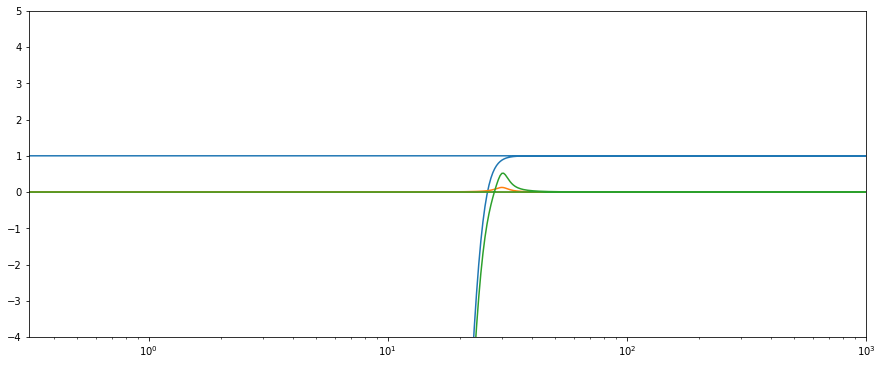

In [49]:
def lorentzian(w, w0, g):
    return (1/pi) * (g/2) / ( (w-w0)**2 + (g/2)**2 )

t = linspace(0,2,20000)
sig = sin(30*2*np.pi*t)
fft_sig = fft.fft(sig)
fft_freq = fft.fftfreq(len(sig),1/10000)

sos = signal.butter(8, 12, 'highpass', fs=10000, output='sos')
filt_freq, filt_response = signal.sosfreqz(sos,worN=len(fft_sig),fs=10000)
lor_response = lorentzian(fft_freq,30,5)
res_response = 5*lor_response+(20*np.log10(absolute(filt_response)))
res_response[int(len(res_response)/2)+1:] = np.flip(res_response[1:int(len(res_response)/2)])
semilogx(fft_freq,1+20*np.log10(absolute(filt_response)))
semilogx(fft_freq,lor_response)
plot(fft_freq,res_response)
xlim(0,1000)
ylim(-4,5)
                                           

# Filter creation

[1.00000006 1.00000006 1.00000006 1.00000006 1.00000006 1.00000006
 1.00000006 1.00000006 1.00000006 1.00000006]
[6.29047923e-08 6.44457549e-08 6.44587212e-08 6.44716973e-08
 6.44846772e-08 6.44976563e-08 6.45106489e-08 6.45236368e-08
 6.45366257e-08 6.45496262e-08]
[-0.00942553+0.00000000e+00j -0.00942553-1.48055905e-06j
 -0.00942553-2.96111750e-06j -0.00942553-4.44167542e-06j
 -0.00942553-5.92223493e-06j -0.00942553-7.40279416e-06j
 -0.00942553-8.88335376e-06j -0.00942553-1.03639137e-05j
 -0.00942553-1.18444745e-05j -0.00942553-1.33250355e-05j]
[-0.00942553+0.00000000e+00j -0.00942553-1.48055915e-06j
 -0.00942553-2.96111769e-06j -0.00942553-4.44167571e-06j
 -0.00942553-5.92223531e-06j -0.00942553-7.40279463e-06j
 -0.00942553-8.88335433e-06j -0.00942553-1.03639144e-05j
 -0.00942553-1.18444753e-05j -0.00942553-1.33250364e-05j]
2.0


C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


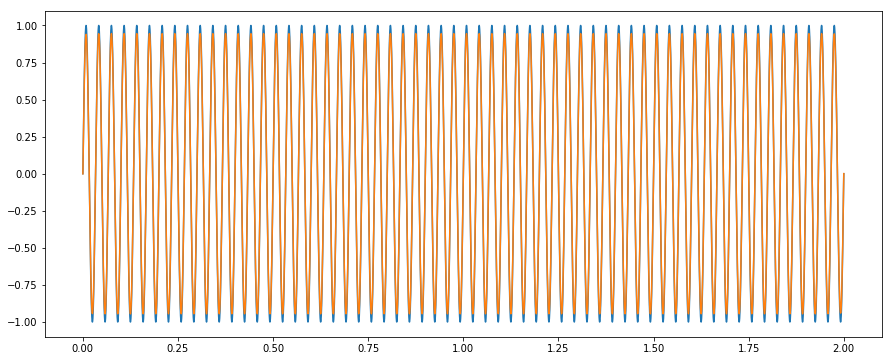

In [42]:
# def resonant_filter(sig, w_res, res_width, fs = 10000):
#     fft_sig = fft.fft(sig)
#     fft_freqs = fft.fftfreq(len(sig),1/fs)
#     sos = signal.butter(8, 12, 'highpass', fs=fs, output='sos')
#     filt_freq, filt_response = signal.sosfreqz(sos,worN=len(fft_sig),fs=fs)
#     lor_response = lorentzian(fft_freq,w_res,res_width)
#     res_response = 10*lor_response+(1+20*np.log10(absolute(filt_response)))
#     res_response[int(len(res_response)/2)+1:] = np.flip(res_response[1:int(len(res_response)/2)])
#     fft_filt = fft_sig*exp(res_response)
#     fft_filt[0] = 0+0j
    
#     plot(fft_freqs,abs(fft_sig))
#     plot(fft_freqs,res_response)
#     xlim(-110,110)
#     ylim(-100,100)
#     plot(fft_freqs,absolute(fft_filt))
    
    
#     return fft.ifft(fft_filt)

def resonant_filter(sig, w_res, res_width, fs = 10000):
    fft_sig = fft.fft(sig)
    fft_freq = fft.fftfreq(len(sig),1/fs)
    sos = signal.butter(8, 12, 'highpass', fs=fs, output='sos')
    filt_freq, filt_response = signal.sosfreqz(sos,worN=len(fft_sig),fs=fs)
    lor_response = lorentzian(fft_freq,w_res,res_width)
    res_response = 1*lor_response+(20*np.log10(absolute(filt_response)))
    res_response[int(len(res_response)/2)+1:] = np.flip(res_response[1:int(len(res_response)/2)])
    fft_filt = fft_sig*exp(res_response)
    print(exp(res_response[10000:10010]))
    print(res_response[10000:10010])
    print(fft_sig[10000:10010])
    print(fft_filt[10000:10010])
#     fft_filt[0] = 0+0j
    
#     plot(fft_freqs,abs(fft_sig))
#     plot(fft_freqs,res_response)
#     xlim(-110,110)
#     ylim(-100,100)
#     plot(fft_freqs,absolute(fft_filt))
    
    print(len(fft.ifft(fft_filt))/fs)
    return fft.ifft(fft_filt)
    
t = linspace(0,2,20000)
sign = sin(30*2*np.pi*t)
# sign2 = sin(100*2*np.pi*t)
# sign3 = sin(200*2*np.pi*t)
# sign = sign1+sign2+sign3
filtered = resonant_filter(sign,30,10)
# print(max(sign),max(filtered))
plot(t,sign)
# plot(t,sign1)
# plot(t,sign2)
# plot(t,sign3)
plot(t,filtered)
# xlim(0,0.02)